<a href="https://colab.research.google.com/github/Ad603-tech/Deep-Learning-Projects/blob/main/3_layer_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating a dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

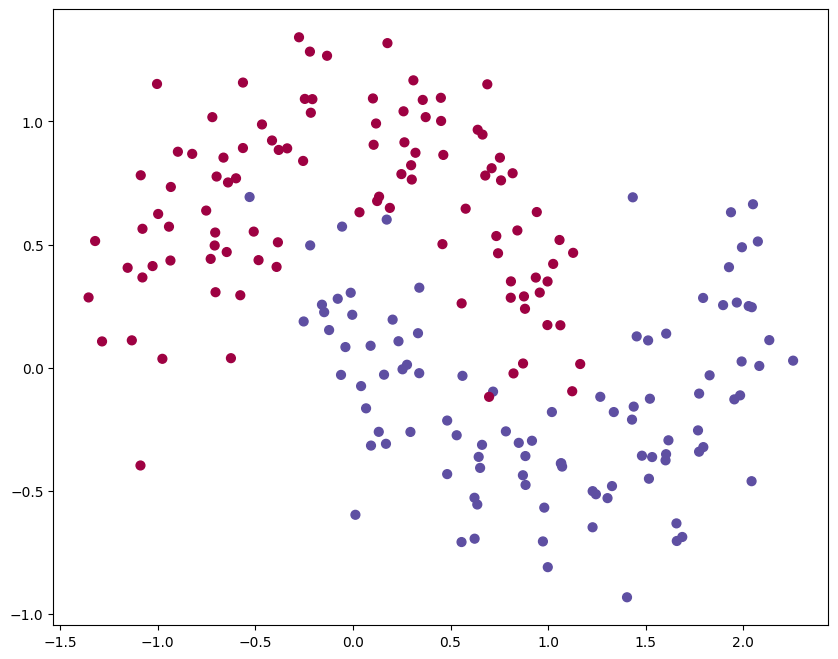

In [3]:
# generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [4]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)


LogisticRegressionCV()

In [5]:
# function to plot a decision boundary

def plot_descision_boundary(pred_func):
  # Set min and max values and give it some padding
  x_min, x_max = X[:,0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:,0].min() - 0.5, X[:, 0].max() + 0.5
  h = 0.01
  # generate a grid of points with distance h between them
  xx, yy  =np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Predict the function value for the whole grid
  Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  # Plot the contour and training examples
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logisticsc Regression')

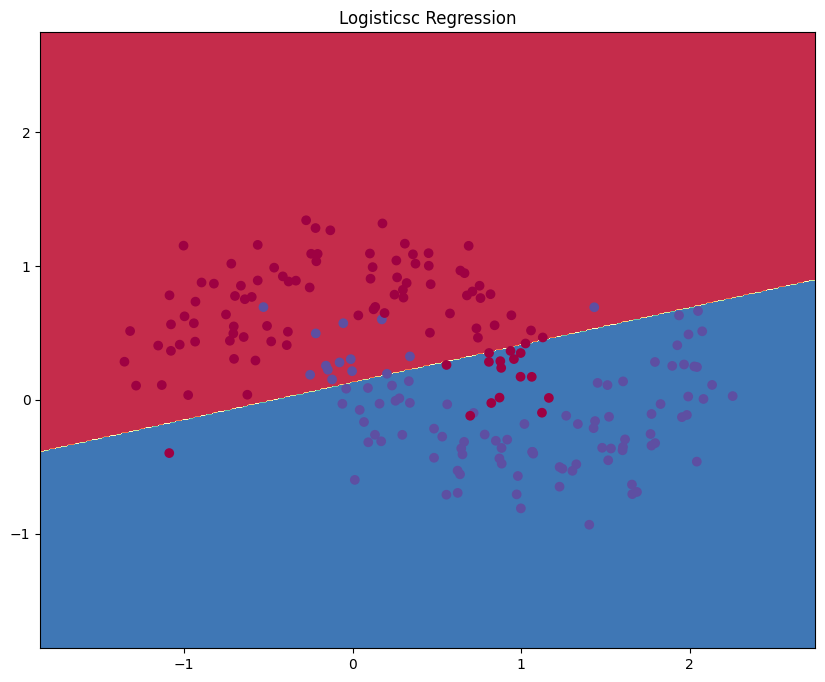

In [6]:
#Plot the decision boundary
plot_descision_boundary(lambda x: clf.predict(x))
plt.title("Logisticsc Regression")

Implementation

In [7]:
num_examples = len(X) #training set size
nn_input_dim = 2
nn_output_dim = 2

# gradient descent parameters
epsilon = 0.01
reg_lambda = 0.01

In [8]:
#Function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [9]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [17]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
  # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    model = {}

    # gradient descent
    for i in range(0, num_passes):

      #forward propogation
      z1 = X.dot(W1) + b1
      a1 = np.tanh(z1)
      z2 = a1.dot(W2) + b2
      exp_scores = np.exp(z2)
      probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)

      #Backpropogation
      delta3 = probs
      delta3[range(num_examples), y] -= 1
      dW2 = (a1.T).dot(delta3)
      db2 = np.sum(delta3, axis=0, keepdims=True)
      delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
      dW1 = np.dot(X.T, delta2)
      db1 = np.sum(delta2, axis=0)

      # Add regularization terms (b1 and b2 dont have regularization terms)
      dW2 += reg_lambda * W2
      dW1 += reg_lambda * W1

      #Gradient descent parameter update
      W1 += -epsilon * dW1
      b1 += -epsilon * db1
      W2 += -epsilon * dW2
      b2 += -epsilon * db2

      # Assign new paramaeters to the model
      model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

      # print the loss
      if print_loss and i % 1000 == 0:
        print("loss after iteration %i: %f" %(i, calculate_loss(model)))

    return model





A network with hidden layer size 3

loss after iteration 0: 0.432387
loss after iteration 1000: 0.068947
loss after iteration 2000: 0.068925
loss after iteration 3000: 0.070752
loss after iteration 4000: 0.070748
loss after iteration 5000: 0.070751
loss after iteration 6000: 0.070754
loss after iteration 7000: 0.070756
loss after iteration 8000: 0.070757
loss after iteration 9000: 0.070758
loss after iteration 10000: 0.070758
loss after iteration 11000: 0.070758
loss after iteration 12000: 0.070758
loss after iteration 13000: 0.070758
loss after iteration 14000: 0.070758
loss after iteration 15000: 0.070758
loss after iteration 16000: 0.070758
loss after iteration 17000: 0.070758
loss after iteration 18000: 0.070758
loss after iteration 19000: 0.070758


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

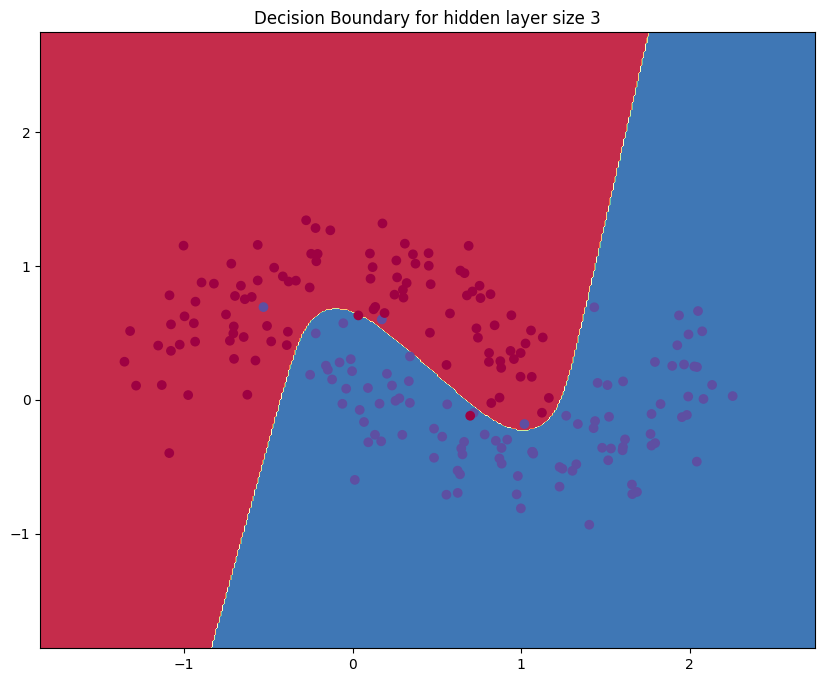

In [16]:
# Build a model with 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_descision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

Vaarying the hidden layer size

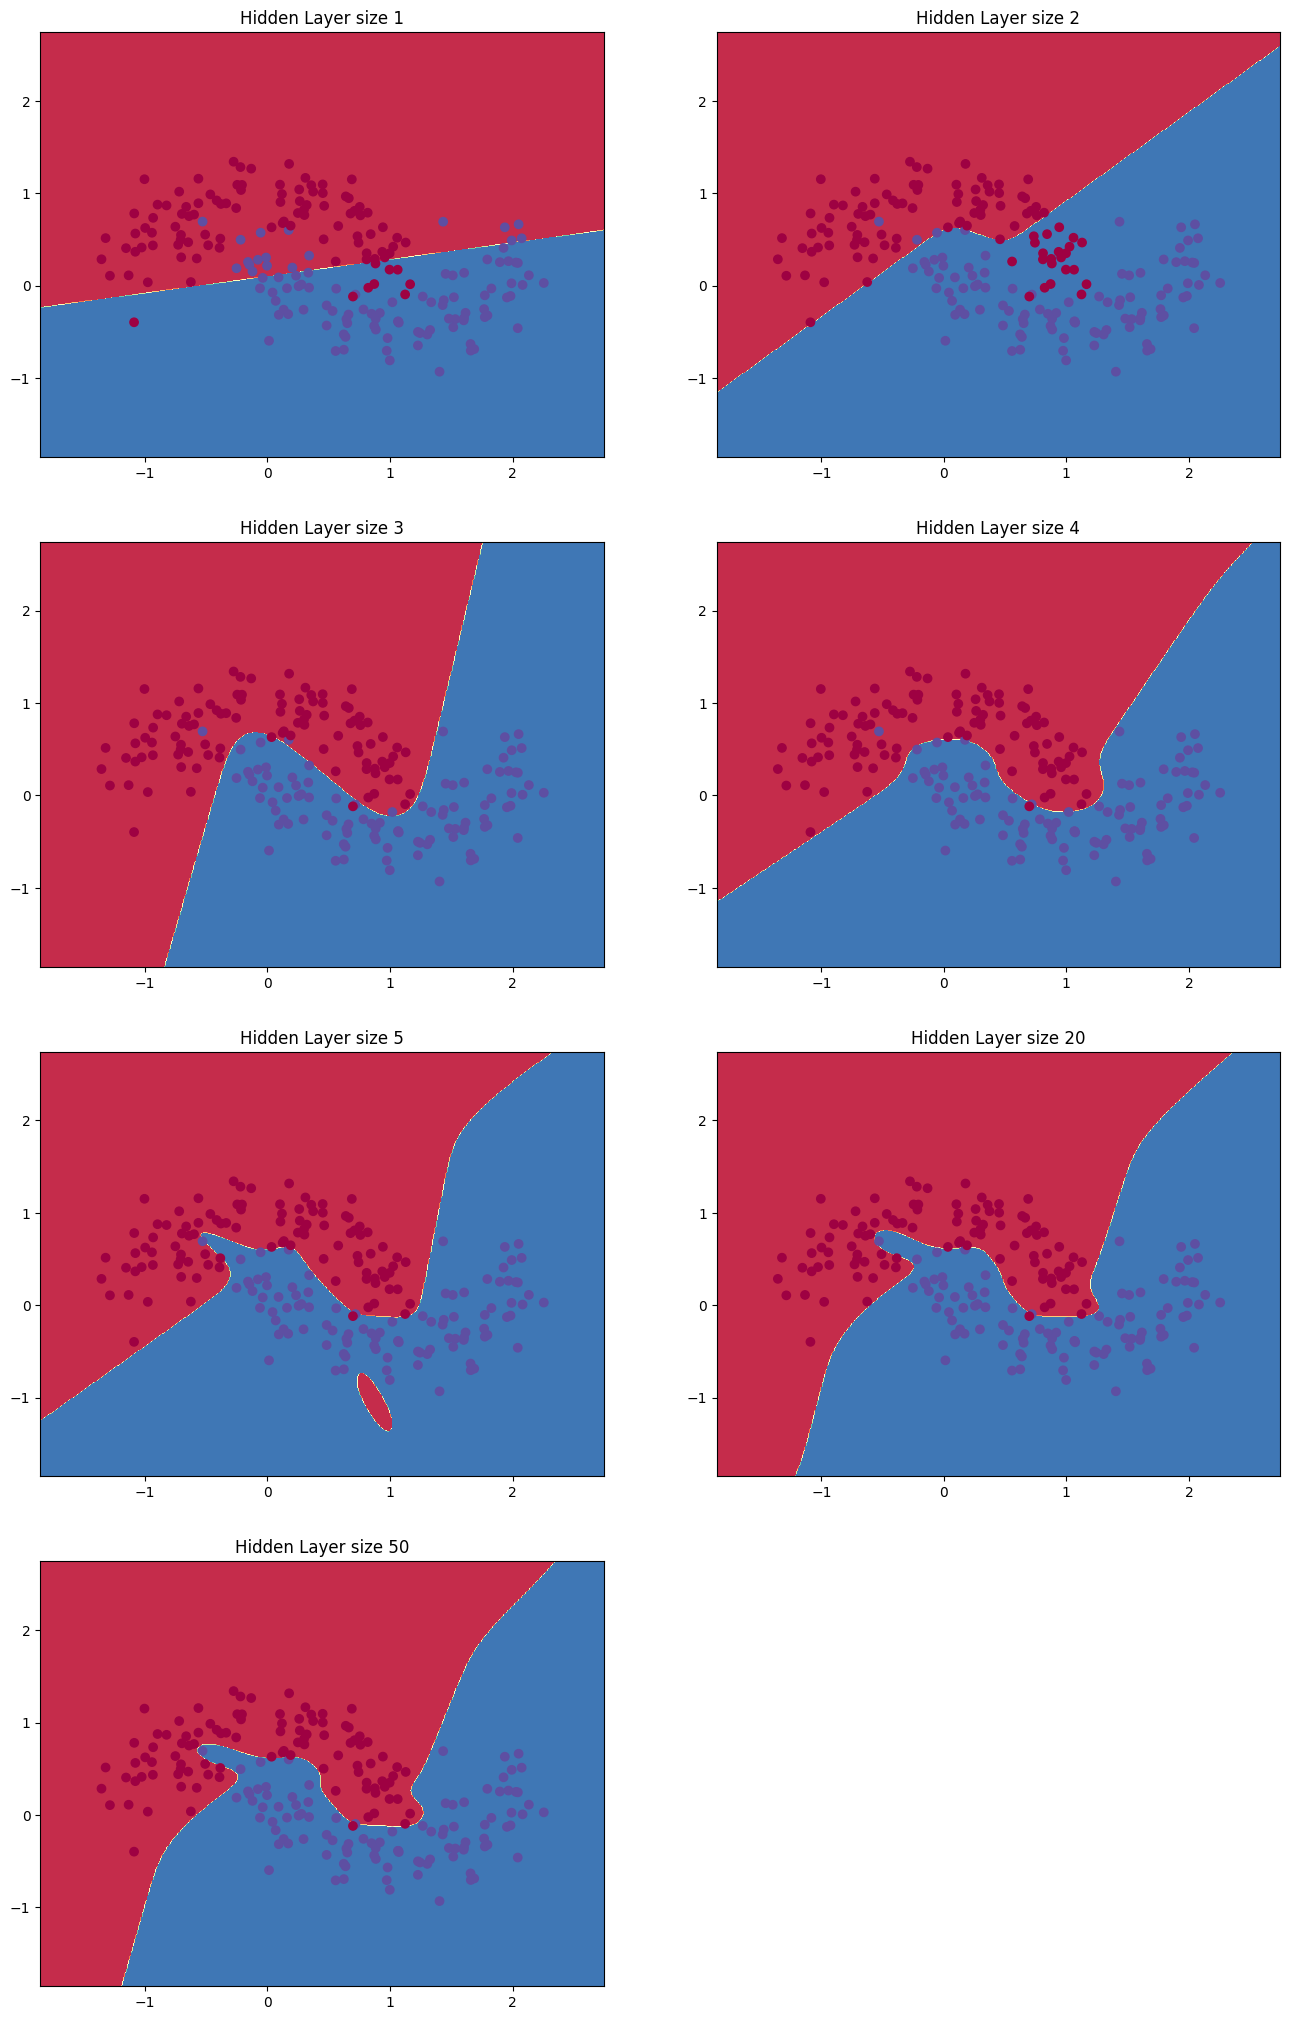

In [19]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
  plt.subplot(5, 2, i+1)
  plt.title('Hidden Layer size %d' % nn_hdim)
  model = build_model(nn_hdim)
  plot_descision_boundary(lambda x: predict(model, x))
plt.show()